In [171]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
spotify = pd.read_csv(r'C:\Users\DELL\OneDrive\Desktop\spotify.csv')
spotify.head()

,Date,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
0,1/6/2017,12287078,NaN,NaN,NaN,NaN
1,1/7/2017,13190270,NaN,NaN,NaN,NaN
2,1/8/2017,13099919,NaN,NaN,NaN,NaN
3,1/9/2017,14506351,NaN,NaN,NaN,NaN
4,1/10/2017,14275628,NaN,NaN,NaN,NaN


In [173]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      366 non-null    object 
 1   Shape of You              366 non-null    int64  
 2   Despacito                 359 non-null    float64
 3   Something Just Like This  319 non-null    float64
 4   HUMBLE.                   282 non-null    float64
 5   Unforgettable             275 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 17.3+ KB


In [180]:
first_day_stream = spotify.drop(labels='Date', axis=1).fillna(method='bfill').iloc[0, :]
first_day_stream

Shape of You                12287078.0
Despacito                     275178.0
Something Just Like This      215591.0
HUMBLE.                      5591687.0
Unforgettable                 317011.0
Name: 0, dtype: float64

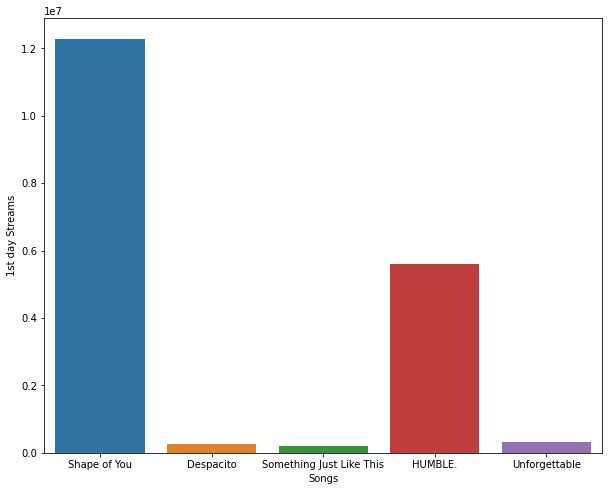

In [254]:
first_day_stream_df = first_day_stream.reset_index()
first_day_stream_df.columns = ['Songs', '1st day Streams']
plt.figure(figsize = (10,8))
ax = sns.barplot(x = 'Songs', y = '1st day Streams', data = first_day_stream_df)

In [ ]:
# Comment: Lượng stream ngày đầu của Shape of You cao áp đảo với 12.2M, gấp >2 lần bài cao thứ 2 là HUMBLE và bỏ xa 3 bài còn lại.

In [221]:
highest_daily_stream = spotify[['Shape of You','Despacito','Something Just Like This','HUMBLE.','Unforgettable']].max()
highest_daily_stream

Shape of You                19764745.0
Despacito                   23218183.0
Something Just Like This     9736931.0
HUMBLE.                     13144962.0
Unforgettable                7483165.0
dtype: float64

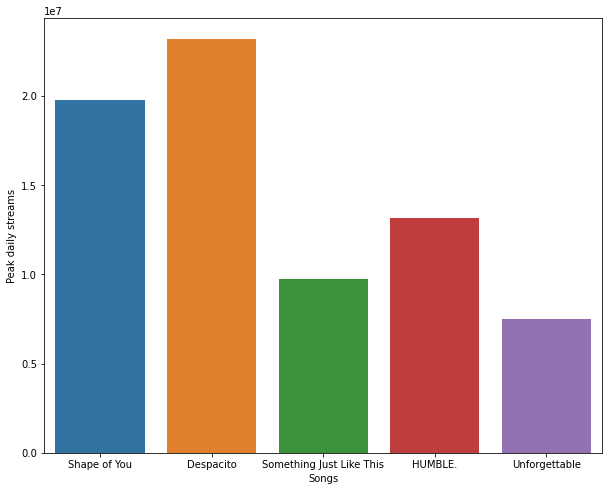

In [255]:
highest_daily_stream_df = highest_daily_stream.reset_index()
highest_daily_stream_df.columns = ['Songs', 'Peak daily streams']
plt.figure(figsize = (10,8))
ax = sns.barplot(x = 'Songs', y = 'Peak daily streams', data = highest_daily_stream_df)

In [ ]:
# Tuy có lượng stream ngày đầu khủng nhất nhưng peak lượng stream daily không phải đến từ Shape of you mà là Despacito (23.2M), dù stream ngày đầu rất khiêm tốn (chỉ 275k). 
# Shape of you đứng thứ 2 với peak 19.7M stream

In [223]:
avg_daily_stream = spotify[['Shape of You','Despacito','Something Just Like This','HUMBLE.','Unforgettable']].mean()
avg_daily_stream

Shape of You                8.180297e+06
Despacito                   9.165803e+06
Something Just Like This    4.345637e+06
HUMBLE.                     4.649801e+06
Unforgettable               4.687821e+06
dtype: float64

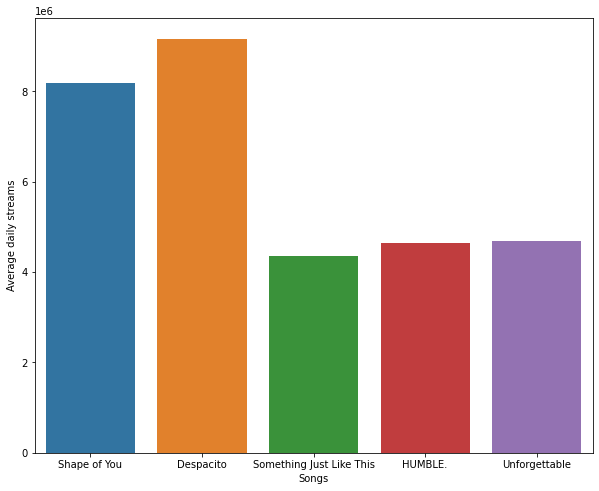

In [256]:
avg_daily_stream_df = avg_daily_stream.reset_index()
avg_daily_stream_df.columns = ['Songs', 'Average daily streams']
plt.figure(figsize = (10,8))
ax = sns.barplot(x = 'Songs', y = 'Average daily streams', data = avg_daily_stream_df)

In [257]:
# Tương ứng với peak daily cao nhất, Despacito cũng đứng đầu lượng stream trung bình theo ngày với 9.1M stream, chứng tỏ stream rất ổn định.
# Tương tự với Shape of you, tiếp tục đứng vị trí thứ 2 lượng stream trung bình ngày 8.1M
# 3 bài còn lại có lượng stream trung bình xấp xỉ nhau. HUMBLE. có khởi đầu khá tốt (đứng t2 lượng stream ngày đầu) nhưng không có sự bứt phá mạnh

In [225]:
spotify['Date'] = spotify['Date'].apply(pd.to_datetime)
spotify['Month'] = spotify['Date'].dt.strftime('%Y/%m')
spotify

,Date,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable,Month
0,2017-01-06,12287078,NaN,NaN,NaN,NaN,2017/01
1,2017-01-07,13190270,NaN,NaN,NaN,NaN,2017/01
2,2017-01-08,13099919,NaN,NaN,NaN,NaN,2017/01
3,2017-01-09,14506351,NaN,NaN,NaN,NaN,2017/01
4,2017-01-10,14275628,NaN,NaN,NaN,NaN,2017/01
...,...,...,...,...,...,...,...
361,2018-01-05,4492978,3450315.0,2408365.0,2685857.0,2869783.0,2018/01
362,2018-01-06,4416476,3394284.0,2188035.0,2559044.0,2743748.0,2018/01
363,2018-01-07,4009104,3020789.0,1908129.0,2350985.0,2441045.0,2018/01
364,2018-01-08,4135505,2755266.0,2023251.0,2523265.0,2622693.0,2018/01


In [226]:
monthly_stream = spotify.groupby('Month',as_index=False).agg('sum').replace(0, np.nan)
monthly_stream

,Month,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
0,2017/01,366007170,71480567.0,NaN,NaN,NaN
1,2017/02,407227623,202291897.0,47546785.0,NaN,NaN
2,2017/03,469111248,204776812.0,245218470.0,5591687.0,NaN
3,2017/04,340035736,331026405.0,230799878.0,275145533.0,39663050.0
4,2017/05,269169687,589562035.0,179955790.0,242281099.0,131442332.0
5,2017/06,219295280,539655575.0,146163025.0,180304289.0,181656672.0
6,2017/07,199073911,461977945.0,132798116.0,133413179.0,213261232.0
7,2017/08,166852553,318601413.0,105478568.0,114295251.0,204649939.0
8,2017/09,137980741,197573957.0,81839334.0,100877545.0,169958259.0
9,2017/10,127884795,138591790.0,71048883.0,90080702.0,134255422.0


In [229]:
first_month_stream = monthly_stream.drop(labels='Month', axis=1).fillna(method='bfill').iloc[0, :]
first_month_stream

Shape of You                366007170.0
Despacito                    71480567.0
Something Just Like This     47546785.0
HUMBLE.                       5591687.0
Unforgettable                39663050.0
Name: 0, dtype: float64

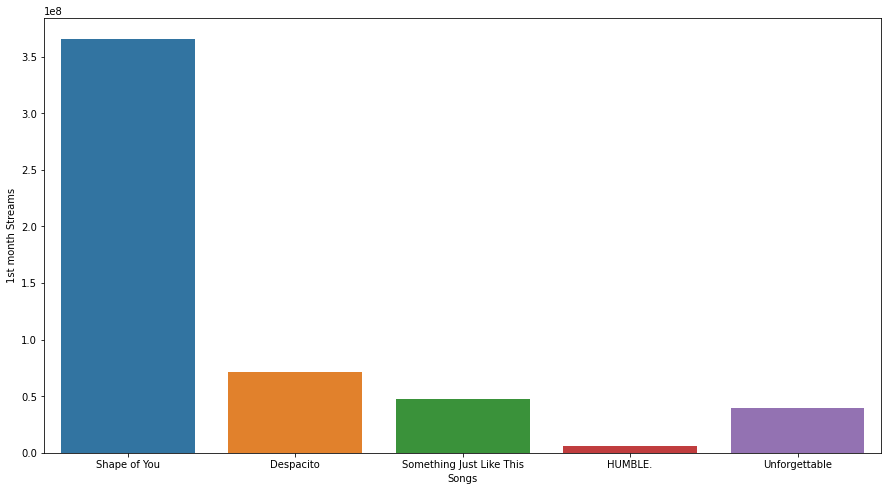

In [244]:
first_month_stream_df = first_month_stream.reset_index()
first_month_stream_df.columns = ['Songs', '1st month Streams']
plt.figure(figsize = (10,8))
ax = sns.barplot(x = 'Songs', y = '1st month Streams', data = first_month_stream_df)

In [231]:
highest_monthly_stream = monthly_stream[['Shape of You','Despacito','Something Just Like This','HUMBLE.','Unforgettable']].max()
highest_monthly_stream

Shape of You                469111248.0
Despacito                   589562035.0
Something Just Like This    245218470.0
HUMBLE.                     275145533.0
Unforgettable               213261232.0
dtype: float64

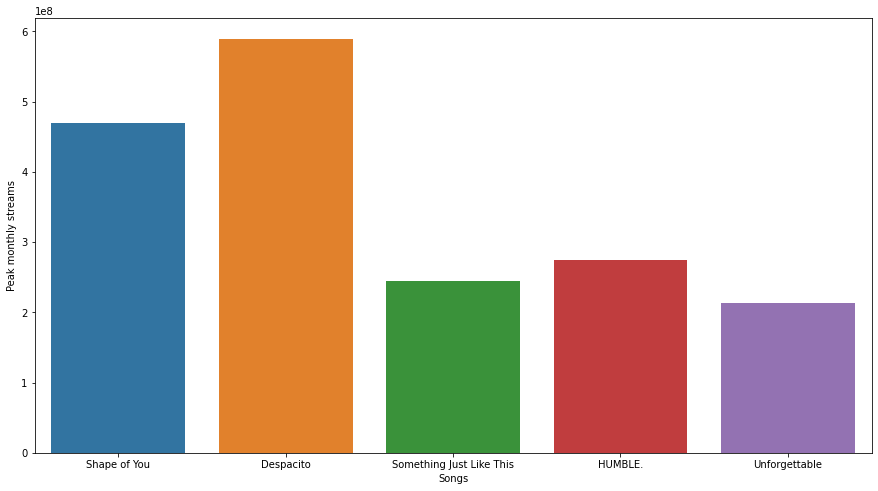

In [246]:
highest_monthly_stream_df = highest_monthly_stream.reset_index()
highest_monthly_stream_df.columns = ['Songs', 'Peak monthly streams']
plt.figure(figsize = (10,8))
ax = sns.barplot(x = 'Songs', y = 'Peak monthly streams', data = highest_monthly_stream_df)

In [227]:
dfm = monthly_stream.melt('Month', var_name='Song', value_name='Streams')
dfm

,Month,Song,Streams
0,2017/01,Shape of You,366007170.0
1,2017/02,Shape of You,407227623.0
2,2017/03,Shape of You,469111248.0
3,2017/04,Shape of You,340035736.0
4,2017/05,Shape of You,269169687.0
...,...,...,...
60,2017/09,Unforgettable,169958259.0
61,2017/10,Unforgettable,134255422.0
62,2017/11,Unforgettable,103967478.0
63,2017/12,Unforgettable,86307202.0


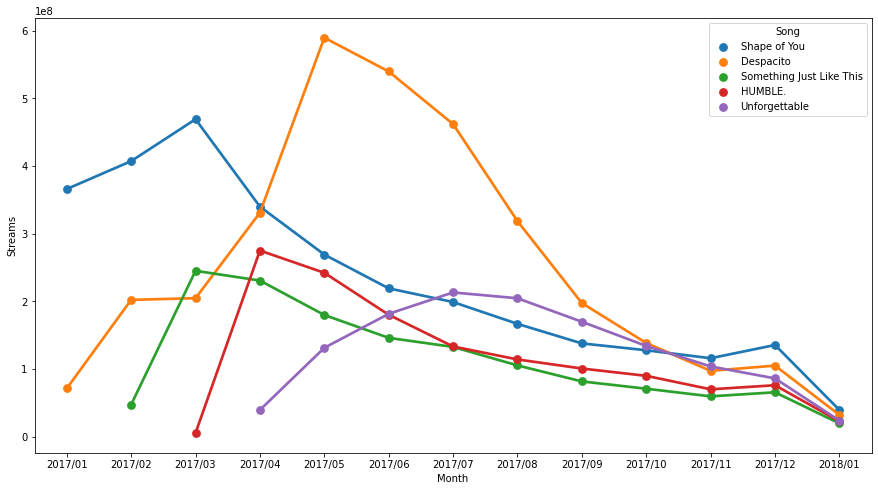

In [243]:
plt.figure(figsize = (15,8))
ax1=sns.pointplot(data=dfm, x="Month", y='Streams',hue='Song')

In [ ]:
# Ở quy mô tháng Shape of You cũng cho thấy thành tích giai đoạn đầu cực khủng với 366M trong tháng đầu tiên, bỏ xa các đối thủ còn lại. Thành tích này không thể không kể tới ảnh hưởng của tên tuổi "hit-maker" được bảo chứng - Ed Sheeran
# Tuy nhiên Despacito mới là "con quái vật" có sự bứt phá ngoạn mục nhất. 
# Trong khi hầu hết các bài đều đạt peak monthly stream sau tháng đầu tiên (Shape of You đạt peak 469M stream sau 2 tháng) sau đó lượt stream giảm dần, thì Despacito vẫn tiếp tục tăng mạnh mẽ và bùng nổ vào tháng thứ 5, với peak 589M stream ấn tượng
# Sau khi đạt peak tất cả đều giảm dần lượng stream hàng tháng, tăng nhẹ vào cuối năm (mùa trao các giải thưởng âm nhạc) sau đó lại giảm

In [236]:
avg_monthly_stream = monthly_stream.mean()
avg_monthly_stream

C:\Users\DELL\AppData\Local\Temp\ipykernel_12304\2089275149.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg_monthly_stream = monthly_stream.mean()


Shape of You                2.303068e+08
Despacito                   2.531172e+08
Something Just Like This    1.155215e+08
HUMBLE.                     1.192040e+08
Unforgettable               1.289151e+08
dtype: float64

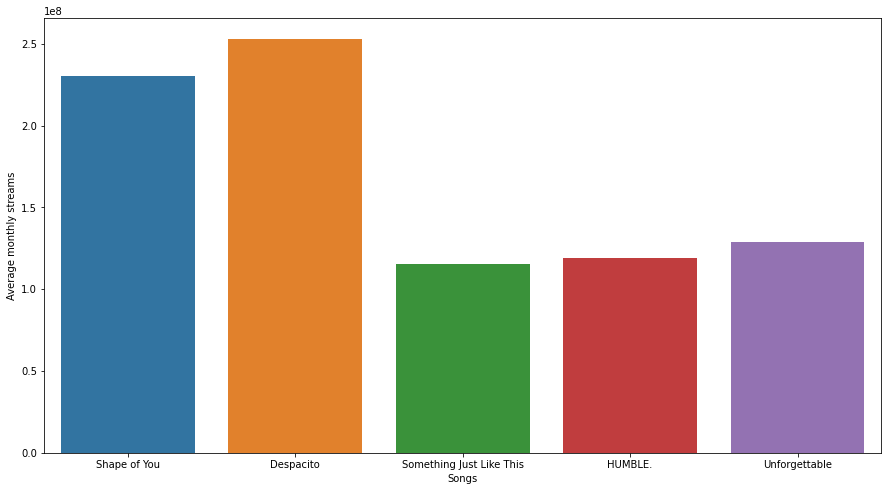

In [245]:
avg_monthly_stream_df = avg_monthly_stream.reset_index()
avg_monthly_stream_df.columns = ['Songs', 'Average monthly streams']
plt.figure(figsize = (10,8))
ax = sns.barplot(x = 'Songs', y = 'Average monthly streams', data = avg_monthly_stream_df)

In [ ]:
# Despacito và Shape of You lần lượt đứng #1 và #2 về lượng stream trung bình tháng với 253M và 230M stream, gấp ~2 lần so với các bài còn lại
# Tổng kết: Shape of You có thành tích khởi đầu tốt nhất và giữ phong độ tương đối ổn định từ đầu đến cuối, còn Despacito có cú lội ngược dòng vô cùng ấn tượng và thành tích đường dài xuất sắc nhất trong năm 2017

In [ ]:
# Em muốn phân tích thêm metric số ngày đạt mốc 100M stream và 1B stream của từng bài nữa nhưng không tìm được cách code. Anh/chị chữa bài cho em tham khảo solution với nhe ạ :D